## Re-introducing classes

In the previous lecture, we have learned about using `pandas` for database manipulation / visualisation, as well as some additional functionalities of the `matplotlib` package. We will now combine this knowledge with one of the most common objects and methodologies in Python: `classes` (and hopefully refresh our memory of them!).

In the following section we will create a `class` which generates and plots some arbitrary data for us.

First however, we will be switching from using `matplotlib` in a different mode, called `nbagg`. The reason for this is to allow us to **use interactive plots and animated plots within Jupyter Notebook**. When using Python scripts this is not necessary.  
To change the mode, we use the `matplotlib` IPython magic function by calling `%matplotlib` and telling this function to use the new mode called `nbagg`. Altogether, the necessary command looks like `%matplotlib nbagg`. Note that we are doing this before the `import` statement to ensure that it is not overwritten.

In [32]:
%matplotlib nbagg
%matplotlib inline

In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.widgets
import seaborn as sns

## The `Person` class

The `Person` class will be used during this set of notes. It has been chosen because it is conceptually simple to understand and will allow us to revisit the concept of the Python `class`. 

As a reminder, a class is declared using the `class` statement. Although not strictly necessary, **good coding practices** to improve readability would require you to always name a class using a capitalised first letter (i.e. the `P` in `Person`), and write the full name represented in so-called **CamelCase**. In CamelCase, spaces are removed and the first letter of each word is capitalised. For example, I should use as a class name `MyClassName` but not the (equally valid) `my_Class_name`.

In the `Person` class in our example, there are 4 arguments which are mapped to 4 attributes. These are:
- `age` [years]
- `height` [m]
- `weight` [kg]
- `country` (3-letter code e.g. GBR)

We also present something new which is the `property` **decorator**. We will briefly describe why this is used and how it works, and will also provide a link to learn more about **Python decorators** (introduced in Python3) in general. 

### Declaring the class using __init__ and docstring

A class is declared using (the `(Inherited)` is optional, and is not used for `Person`):
```python
class Class(Inherited):
    """A description of the class here"""
    def __init__(self, *args, **kwargs):
        ...
```
The `__init__` function is run automatically when creating a new instance of a class, and is known as the initialisation step. In our initialisation step, we allocate the arguments of the `__init__` function to the <b>attributes</b> of the `Person` class, which can be accessed by using `person_obj.attribute`.

We also provide what is known as a docstring which is a description of the class to a user who is not familiar with the code. This is done by using triple quotes (`"""..."""`). If we type `help(Person)` or `help(person_object)` then these docstrings will be printed to the screen.

After this there is a method called `__repr__`. This function is known as the representation function. This returns a string that is printed to the screen when a `person_object` is called.

Finally we have three `property` methods: `bmi`, `weight_status`, `series`. On a superficial level, a class `property` is a class method that is called like an attribute, that is, without the need for parenthesis. Below are some examples, where you can see how it works. If you wonder why we would need to have a property decorator at all instead of simply using a standard method attribute, have a look at the hyperlinks [here](https://www.freecodecamp.org/news/python-property-decorator/) and here [here](https://www.youtube.com/watch?v=8BbngXWouzo).

In [34]:
class Person:
    """A person - declared using age [years], height [m], weight [kg] and 3-letter country code e.g. GBR"""
    def __init__(
        self, 
        age: int, 
        height: float, 
        weight: float,
        weekly_exercise: float,
    ):
        # allocate arguments to attributes
        self.age = age
        self.height = height
        self.weight = weight
        self.exercise = weekly_exercise
        
    def __repr__(self) -> str:
        return (f"Person[{self.age}]("
            f"{self.height}m, {self.weight}kg)")
        
    @property
    def bmi(self) -> float:
        """Returns the internationally recognised description of BMI"""
        return self.weight / self.height ** 2
    
    @property
    def weight_status(self) -> str:
        """Returns the internationally recognised defintions of weight
        status, given by the BMI"""
        _bmi = self.bmi
        if _bmi < 18.5:
            return 'underweight'
        elif _bmi >= 18.5 and _bmi < 25.0:
            return 'normal'
        elif _bmi >= 25.0 and _bmi < 30.0:
            return 'overweight'
        elif _bmi >= 30.0:
            return 'obese'
        
    @property
    def series(self) -> pd.Series:
        """Returns a pd.Series of the Person"""
        return pd.Series({
            **vars(self),
            'bmi': self.bmi,
            'weight_status': self.weight_status,
        })

# create person
person = Person(25, 1.75, 75, 10.0)

# Print series
print(f'Series:\n\n{person.series}')

# show what __repr__ does
person.__repr__()

Series:

age                     25
height                1.75
weight                  75
exercise              10.0
bmi              24.489796
weight_status       normal
dtype: object


'Person[25](1.75m, 75kg)'

Here we present a simple function to generate some random data, based on the `Person` class.

In [35]:
def generate_people(N: int) -> pd.DataFrame:
    """Generate a DataFrame using the Person class"""
    
    # create random number generator
    rng = np.random.default_rng()
    
    # initialise list
    people_list = []
    
    # create ranges to sample
    weights = np.arange(65, 85, 0.1)
    heights = np.arange(1.60, 2.00, 0.01)
    ages = np.arange(18, 30, 0.5)
    exercises = np.arange(0., 20., 0.1)
    
    # loop over number of entries
    for i in range(N):
        
        # use rng.choice to select a random value for
        # the initialisation parameters
        person = Person(
            rng.choice(ages),
            rng.choice(heights),
            rng.choice(weights),
            rng.choice(exercises)
        )
        
        # append pd.Series to list
        people_list.append(person.series)
    
    # return DataFrame of people info
    return pd.DataFrame(people_list)

# generate data
data = generate_people(500)
print(f'Data:\n\n{data.head()}')

Data:

    age  height  weight  exercise        bmi weight_status
0  22.0    1.87    75.8       7.5  21.676342        normal
1  19.0    1.89    81.1      17.6  22.703732        normal
2  20.0    1.97    77.2       2.3  19.892293        normal
3  19.0    1.96    84.9       8.5  22.100167        normal
4  24.5    1.62    75.1       4.9  28.616065    overweight


In [36]:
print(data)

      age  height  weight  exercise        bmi weight_status
0    22.0    1.87    75.8       7.5  21.676342        normal
1    19.0    1.89    81.1      17.6  22.703732        normal
2    20.0    1.97    77.2       2.3  19.892293        normal
3    19.0    1.96    84.9       8.5  22.100167        normal
4    24.5    1.62    75.1       4.9  28.616065    overweight
..    ...     ...     ...       ...        ...           ...
495  29.0    1.68    77.2       0.4  27.352608    overweight
496  27.5    1.82    75.4       5.6  22.762951        normal
497  24.5    1.86    77.4       1.9  22.372529        normal
498  23.5    1.88    79.3       7.3  22.436623        normal
499  21.0    1.93    71.8      12.6  19.275685        normal

[500 rows x 6 columns]


## Seaborn

We then use `seaborn` to quickly present this data. **`seaborn` is a great package for simple data exploration and its presets are extremely useful for portraying statistical relationships**, without the need for creating complicated functions that are based on `matplotlib`. See below some examples of different `seaborn` functions (note that `seaborn` is represented by its approved abbreviation `sns`). Here we use `sns.relplot` and `sns.jointplot` to quickly create well-designed summary plots.
```python
# relplot
sns.relplot(data=data, x="height", y="weight", hue="age")

# jointplot
sns.jointplot(x=data['bmi'], y=data['exercise'], kind="hex", color="#4CB391")
```
For more detail, check out the `seaborn` documentation page and website which can be found [here](https://seaborn.pydata.org)

c:\Users\vladimir jurien\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


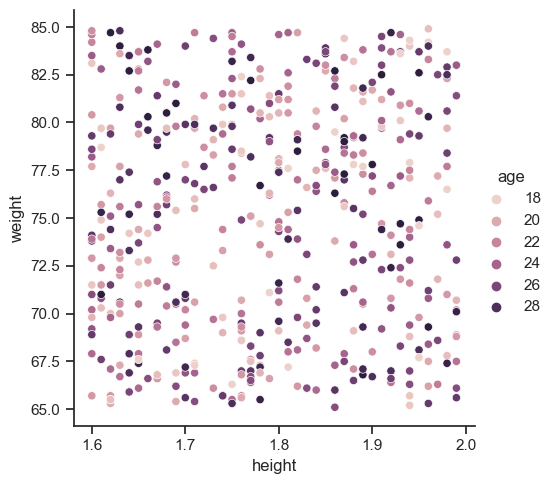

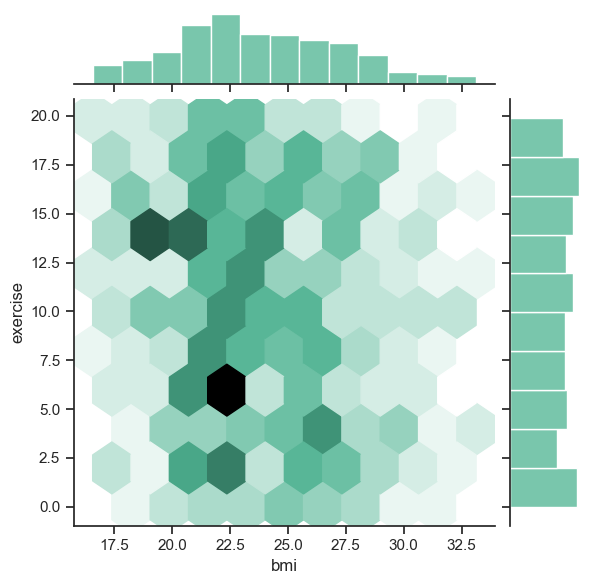

In [37]:
# set theme
sns.set_theme(style="ticks")

# relplot
sns.relplot(data=data, x="height", y="weight", hue="age")

# jointplot
sns.jointplot(x=data['bmi'], y=data['exercise'], kind="hex", color="#4CB391")

## 3D representations of data

Plotting 3D data is similar to plotting 2D data using `matplotlib`. To create a 3D set of axes, the axes declaration is done slightly differently though.
```python
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
```
It is then possible to plot using similar techniques to before, for example using `ax.scatter`.
```python
ax.scatter(data['age'], data['exercise'], data['bmi'])
```
For more examples, check out the 3D examples page on the `matplotlib` webpage, which can be found [here](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

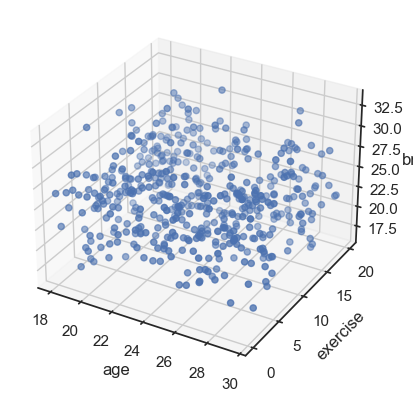

In [38]:
# import 3D capabilities
from mpl_toolkits.mplot3d import Axes3D

# create figure
fig = plt.figure()

# create axes separately
ax = fig.add_subplot(111, projection='3d')

# labelling
ax.set_xlabel('age')
ax.set_ylabel('exercise')
ax.set_zlabel('bmi')

# do scatter plot
ax.scatter(
    data['age'],
    data['exercise'],
    data['bmi'],
)

# show
plt.show()

## Animations

In this example, we use the `matplotlib.animation.FuncAnimation` class to create an animated plot. After creating the axes, we then create a variable called `line` which is returned by `ax.plot`. Note that since `ax.plot` returns a `tuple` but we only care about its first element, we use the synthax `line, ` (line, followed by a comma) to declare `line` to be equal to the first element of the returned `tuple`, whereas the other elements of the tuples will simply be discarded (not assigned to any variable):

```python
line, = ax.plot(x, np.sin(x))
```

When declaring the animation, called `ani`, the second argument when initialising must be a function, this is called the **callback function**. The callback function will be used to generate the data used for the animation, in practice, taking different input values for some parameters that define the function (so that each parameter value generates a different plot, a photogram, of the animation movie). The third argument are exactly these values, in the order they are given to the function to generate the data. These parameters are cycled over during the animation, that is, once the last parameter is reached, the function restarts from the first value. 

For our animation function, a function called `animate` is defined using `i` as an argument which is taken from `np.arange(1, 200)`.

The function updates the y-values of `line` which the `FuncAnimation` class uses to redraw just the `line` and not the whole `plt.Figure`.

```python
def animate(i: float):
    line.set_ydata(np.sin(x + i/10.0))
    return line,
```

The result is an animation of a sine-wave which is looks as though it is moving along the x-axis, that is drawn using the `matplotlib.animation.FuncAnimation` class

```python
ani = matplotlib.animation.FuncAnimation(fig, animate, np.arange(1, 200))
```

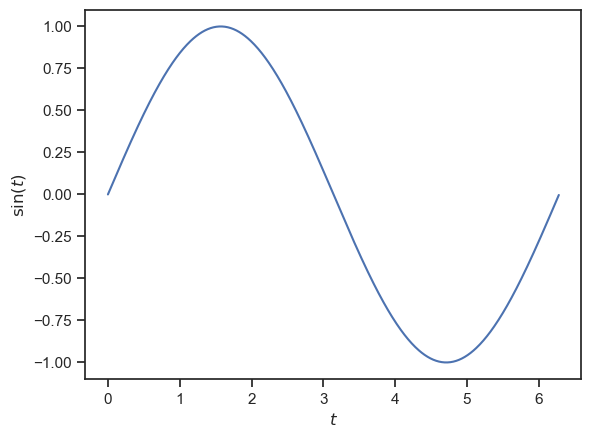

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

# Create figure, axis, and do labeling
fig, ax = plt.subplots()
ax.set_xlabel("$t$")
ax.set_ylabel("$\sin(t)$")

# Initialise line
x = np.arange(0, 2 * np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

# Animation callback function
def animate(i: float) -> plt.Line2D:
    """Updates a previously defined plt.Line2D object"""
    line.set_ydata(np.sin(x + i / 10.0))  # update the data
    return line,

# Create animation class and show
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=np.arange(1, 200), interval=100)
plt.show()


## Interactive (Specific to IPython/Jupyter Notebooks)

When using Jupyter Notebooks, it can be useful to have a simple user interface (known as a Graphical User Interface or GUI) for the user to interact with. This usually means creating filters to hide/show different parts of the data that is being presented.

Here we create a dictionary based on the `weight_status` of the all of the `Person` instances in the data. To filter the data, we create a new variable called `temp` and slice the `DataFrame` by in the normal way, by using `data[...]`. But the indices used for slicing are taken from using the is-equals operator `==`. The result is seen below

> `data['weight_status']==name` returns an array-like boolean result e.g. `[True, True, True, ..., False, True]`

```python
temp = data[data['weight_status']==name]
```

By using dictionaries and for loops in a clever way, we can reduce the amount of code needed and create a set of `plt.Line2D` objects for each category. For this, the `enumerate` function is called and acts on an `iterable` (e.g., a list or a dictionary) to act as an automatic counter. To quote the [Python tips books](https://book.pythontips.com/en/latest/enumerate.html): <b><i>Its usefulness [of the enumerate function] can not be summarized in a single line.</i></b>.  
We use the enumerate function to ensure that only the first line plotted is more opaque, and the rest are more transparent. This is done using the `alpha` keyword argument, and also to select the colours from the `tuple` called `colours`.

```python
lines[name] = ax.scatter(temp['age'], temp['exercise'], c=colours[i], alpha=0.5)
```

The `matplotlib.widgets.RadioButtons` are like a tick-box selection menu, where only one item can be selected. To create this, first a separate set of axes is created in the correct position and then the `matplotlib.widgets.RadioButtons` is initialised.

```python
radio_ax = plt.axes([0.0, 0.45, 0.3, 0.3], facecolor='#FFDDAA')
radio = matplotlib.widgets.RadioButtons(radio_ax, categories)
```

After this, a new callback function is defined that activates whenever a button is pressed to change the transparency of the lines that have already been plotted.
```python
# callback function to run when buttons are pressed
def callback(label: str):
    for name, line in lines.items():
        if name == label:
            line.set_alpha(0.5)
        else:
            line.set_alpha(0.1)
    return

radio.on_clicked(callback)
```
> Callback functions are often used in Javascript, typically for handling events - this is quite an advanced concept in programming and is not be essential to learn at this stage

In [44]:
# create figure and axes - shift to the right
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.45)

# label
ax.set_xlabel('age')
ax.set_ylabel('exercise')

# create categories
categories = (
    'underweight',
    'normal',
    'overweight',
    'obese',
)

# initialise empty dictionary
lines = {}

# create colour palette
colours = ('blue', 'green', 'orange', 'red')

# iterate over all categories
for i, name in enumerate(categories):
    
    # filter dataframe by value
    temp = data[data['weight_status']==name]
    
    # set default value to darker
    if i == 0:
        lines[name] = ax.scatter(
            temp['age'], 
            temp['exercise'], 
            c=colours[i], 
            alpha=0.5
        )
    else:
        lines[name] = ax.scatter(
            temp['age'], 
            temp['exercise'], 
            c=colours[i], 
            alpha=0.05
        )

# create radio box
radio_ax = plt.axes(
    [0.0, 0.45, 0.3, 0.3], 
    facecolor='#FFDDAA'
)

# create radio buttons
radio = matplotlib.widgets.RadioButtons(
    radio_ax, 
    categories,
)

# callback function to run when buttons are pressed
def callback(label: str):
    """Changes the transparency of `lines`"""
    for name, line in lines.items():
        if name == label:
            line.set_alpha(0.5)
        else:
            line.set_alpha(0.1)
    return

# connect function to radio object and show
radio.on_clicked(callback)
plt.show()

<IPython.core.display.Javascript object>

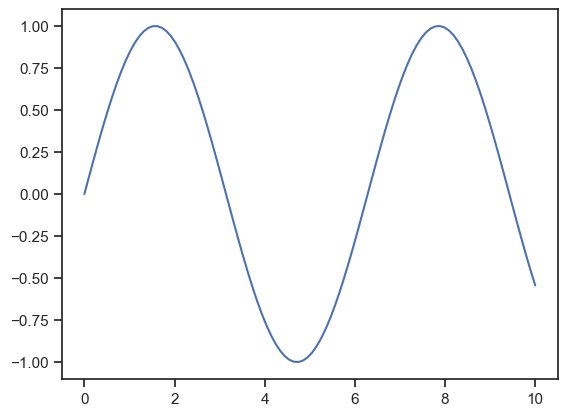

In [30]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.show()